# Final Project - Classification for Credit Card Default

**By: Marc Maestri and Wangui Kamau

## Problem Statement: Using this datatset, we are trying to make a model that can predict if a customer will default on their credit or not. To solve this, we use different variables such as their annual income, the monthly balance of their account, and if they are a student or not. 

### Source: Kaggle

In [374]:
# Import cell
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [375]:
# Read csv
df_credit = pd.read_csv('/Users/marcmaestri/Downloads/credit_card_defaulter.csv')

In [376]:
df_credit.head(10)

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625070
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138950
3,4,No,No,529.250605,35704.493940
4,5,No,No,785.655883,38463.495880
5,6,No,Yes,919.588531,7491.558572
6,7,No,No,825.513331,24905.226580
7,8,No,Yes,808.667504,17600.451340
8,9,No,No,1161.057854,37468.529290
9,10,No,No,0.000000,29275.268290


We want to change the default and student coloumns from 'No' and 'Yes' to 0 and 1 to make classification models. We can also drop the count column 'Unnamed: 0'. 

In [377]:
df_credit['default'] = df_credit.default.factorize()[0]
df_credit['student'] = df_credit.student.factorize()[0]
df_credit = df_credit.drop('Unnamed: 0', axis = 1)

In [378]:
df_credit.head()

,default,student,balance,income
0,0,0,729.526495,44361.62507
1,0,1,817.180407,12106.13470
2,0,0,1073.549164,31767.13895
3,0,0,529.250605,35704.49394
4,0,0,785.655883,38463.49588


In [379]:
# Check for nulls
df_credit.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [380]:
df_credit.describe().T

,count,mean,std,min,25%,50%,75%,max
default,10000.0,0.033300,0.179428,0.000000,0.000000,0.000000,0.000000,1.000000
student,10000.0,0.294400,0.455795,0.000000,0.000000,0.000000,1.000000,1.000000
balance,10000.0,835.374886,483.714985,0.000000,481.731105,823.636973,1166.308387,2654.322576
income,10000.0,33516.981876,13336.639563,771.967729,21340.462905,34552.644800,43807.729275,73554.233500


In [381]:
df_credit.value_counts

<bound method DataFrame.value_counts of       default  student      balance       income
0           0        0   729.526495  44361.62507
1           0        1   817.180407  12106.13470
2           0        0  1073.549164  31767.13895
3           0        0   529.250605  35704.49394
4           0        0   785.655883  38463.49588
...       ...      ...          ...          ...
9995        0        0   711.555020  52992.37891
9996        0        0   757.962918  19660.72177
9997        0        0   845.411989  58636.15698
9998        0        0  1569.009053  36669.11236
9999        0        1   200.922183  16862.95232

[10000 rows x 4 columns]>

# Data Visualization

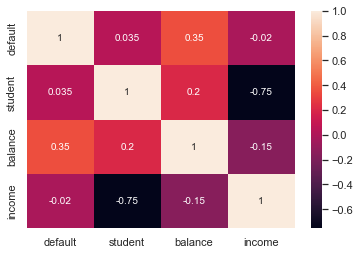

In [382]:
# Heat correlation map
sns.heatmap(df_credit.corr(), annot = True)
plt.show()

Balance correlates most to defaulting.

333

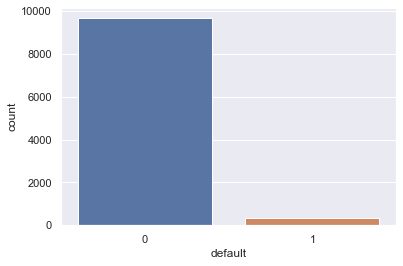

In [383]:
# See how many default vs non default
sns.countplot(x = 'default', data = df_credit)
print
df_credit['default'].value_counts()[1]

We see there are way more non-defaulters than defaulters, so to visualize we need to just take a sample of the non-defaulters.

In [384]:
# Take a fraction of the samples where default is 'no'
df_no = df_credit[df_credit.default == 0].sample(frac=0.05)

# Take all samples  where target value is 'yes'
df_yes = df_credit[df_credit.default == 1]
df_no.head

<bound method NDFrame.head of       default  student      balance        income
7849        0        0   844.312567  52237.725480
516         0        1   836.020689   9271.789924
9387        0        0   110.555931  32419.150790
5450        0        0     0.000000  44980.293040
6267        0        0    72.371953  28717.940620
...       ...      ...          ...           ...
2194        0        0  1470.342593  26136.743690
3125        0        0     0.000000  27167.260390
1240        0        1   502.797735  13376.053340
7238        0        1   385.397521  13739.166140
8726        0        0   294.018790  59128.503400

[483 rows x 4 columns]>

In [385]:
df_yes.head

<bound method NDFrame.head of       default  student      balance       income
136         1        1  1486.998122  17854.39703
173         1        1  2205.799521  14271.49225
201         1        1  1774.694223  20359.50609
206         1        0  1889.599190  48956.17159
209         1        1  1899.390626  20655.20000
...       ...      ...          ...          ...
9912        1        0  2148.898454  44309.91717
9921        1        1  1627.898323  17546.99702
9949        1        0  1750.253150  51578.94016
9951        1        0  1515.606239  48688.51209
9978        1        0  2202.462395  47287.25711

[333 rows x 4 columns]>

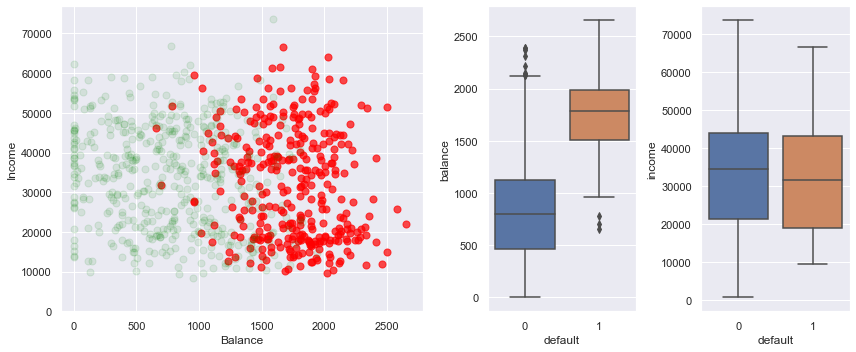

In [386]:
# Create 3 plots together
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Income by balance scatter plot, showing who did default (yes) and the sample of who did not default (no).
ax1.scatter(x=df_yes.balance, y=df_yes.income,  s=50, c='red', linewidths=1, alpha=.7)
ax1.scatter(x=df_no.balance, y= df_no.income,   s=50, linewidths=1,edgecolors='green', facecolors='green', alpha=.1)

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Income')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')

# balance and income box plots, showing who did default (1) and the sample of who did not default (0).
sns.boxplot(data=df_credit, x ="default", y= "balance", ax=ax2)
sns.boxplot(data=df_credit, x ="default", y= "income", ax=ax3)
gs.tight_layout(plt.gcf())

### Findings: From this, we can tell that defaulting does not have to do much with annual income, but more with monthly balance.

Now we want to visualize the other variable, if they are a student or not a student. We want to create a probability chart with both students and non-students and their default rate as monthly balance rises. We also will show a box plot with monthly balance for students and non-students.

<AxesSubplot:xlabel='student', ylabel='balance'>

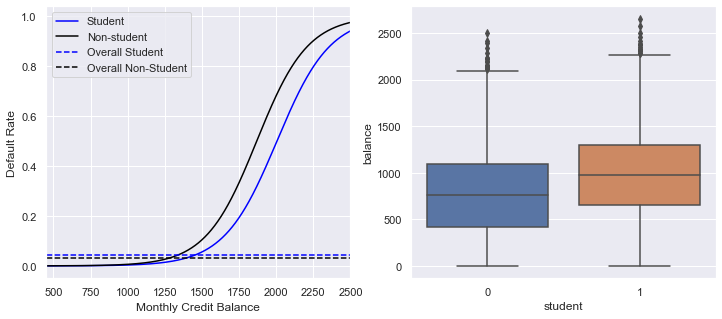

In [387]:
# Balance and default vectors for students
X_train = df_credit.loc[df_credit['student'] == 1].balance.values.reshape(df_credit[df_credit['student'] == 1].balance.size,1) 
y       = df_credit.loc[df_credit['student'] == 1].default

# Repteat for non-students
X_train2 = df_credit.loc[df_credit['student'] == 0].balance.values.reshape(df_credit[df_credit['student'] == 0].balance.size,1)
y2       = df_credit.loc[df_credit['student'] == 0].default

# Vector with balance values for plotting
X_test = np.arange(df_credit.balance.min(), df_credit.balance.max()).reshape(-1,1)

clf = sklm.LogisticRegression(solver='newton-cg')
clf2 = sklm.LogisticRegression(solver='newton-cg')

fit1=clf.fit(X_train,y)
fit2=clf2.fit(X_train2,y2)

prob = fit1.predict_proba(X_test)
prob2 = fit2.predict_proba(X_test)
df_credit.groupby(['student','default']).size().unstack('default')
# Create plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# Student/non-student default rate by montly balance
ax1.plot(X_test, pd.DataFrame(prob)[1], color='blue', label='Student')
ax1.plot(X_test, pd.DataFrame(prob2)[1], color='black', label='Non-student')
ax1.hlines(127/2817, colors='blue', label='Overall Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.hlines(206/6850, colors='black', label='Overall Non-Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Monthly Credit Balance')
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
ax1.set_xlim(450,2500)
ax1.legend(loc=2)

# Student/non-student box plot for monthly balance
sns.boxplot(x='student',y= 'balance', data=df_credit, orient='v', ax=ax2)

<AxesSubplot:xlabel='student', ylabel='income'>

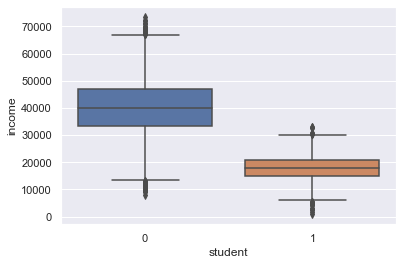

In [388]:
# Boxplot of student or non-student and income
sns.boxplot(x='student', y='income', data=df_credit, orient='v')

## Findings:
#### From the left probability chart we see students rate of default increases at a higher balance than when non-students rate of default increases. We also see the overall default rate for students is higher than non-students. From the right box plot we see on average that students have a higher monthly balance than non-students. We confirmed in the third box plot the assumption that non-students have a higher income than students. Although students make less money, they have a higher monthly credit balance and a higher threshold of monthly credit balance before an increase in default probability. 

## Clustering

In [389]:
# use kmeans - WCSS
WCSS = []
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=9)
    kmeans.fit(df_credit)
    WCSS.append(kmeans.inertia_)
print(WCSS)

[1780821252595.6152, 482448801324.381, 230308843103.33594, 147521603909.36194, 99923791787.23166, 72701155219.35846, 55129712660.309975, 43143471178.264404, 35666847530.03421, 29622670398.320904, 25251894255.58264, 21722887211.81039, 19017357727.09102, 16576467500.797804]


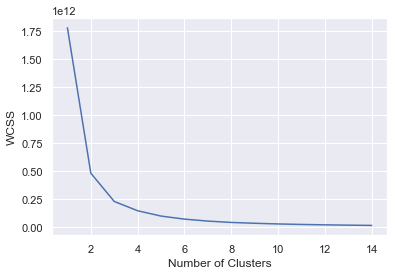

In [390]:
sns.set()
plt.plot(range(1,15),WCSS)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#### I see that increasing the number of clusters, WCSS decreases. Consider 3 clusters which looks optimal.

In [391]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=9)
y=kmeans.fit_predict(df_credit)
df_credit['Cluster']=y
l=['income', 'balance']

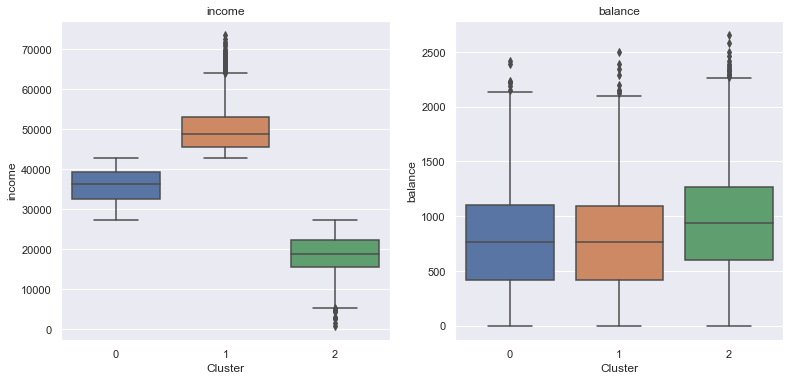

In [392]:
#plot the clusters
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data = df_credit, x = 'Cluster',y = df_credit[l[i]])
    plt.title(l[i])

In [393]:
#name and show the clusters 
credit0=df_credit[df_credit['Cluster']==0]
credit1=df_credit[df_credit['Cluster']==1]
credit2=df_credit[df_credit['Cluster']==2]

In [394]:
credit0

,default,student,balance,income,Cluster
2,0,0,1073.549164,31767.13895,0
3,0,0,529.250605,35704.49394,0
4,0,0,785.655883,38463.49588,0
8,0,0,1161.057854,37468.52929,0
9,0,0,0.000000,29275.26829,0
...,...,...,...,...,...
9979,0,0,173.249172,30697.24506,0
9981,0,0,739.418018,40656.95145,0
9985,0,0,842.949429,39957.12786,0
9988,0,0,0.000000,41740.68660,0


In [395]:
credit1

,default,student,balance,income,Cluster
0,0,0,729.526495,44361.62507,1
13,0,0,606.742343,44994.55585,1
15,0,0,286.232560,45042.41304,1
16,0,0,0.000000,50265.31235,1
18,0,0,485.936864,61566.10612,1
...,...,...,...,...,...
9991,0,0,658.799558,54802.07822,1
9992,0,0,1111.647317,45490.68246,1
9993,0,0,938.836241,56633.44874,1
9995,0,0,711.555020,52992.37891,1


In [396]:
credit2

,default,student,balance,income,Cluster
1,0,1,817.180407,12106.134700,2
5,0,1,919.588531,7491.558572,2
6,0,0,825.513331,24905.226580,2
7,0,1,808.667504,17600.451340,2
10,0,1,0.000000,21871.073090,2
...,...,...,...,...,...
9989,0,1,999.281112,20013.350640,2
9990,0,0,372.379238,25374.899090,2
9994,0,1,172.412988,14955.941690,2
9996,0,0,757.962918,19660.721770,2


103

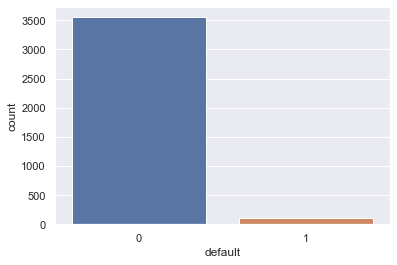

In [397]:
# See how many default vs non default in each cluster...
sns.countplot(x = 'default', data = credit0)
print
credit0['default'].value_counts()[1]

86

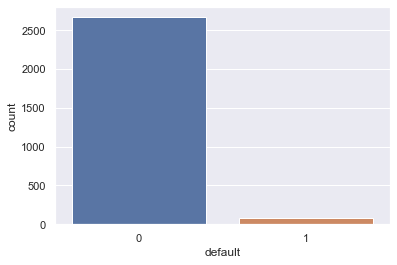

In [398]:
sns.countplot(x = 'default', data = credit1)
print
credit1['default'].value_counts()[1]

144

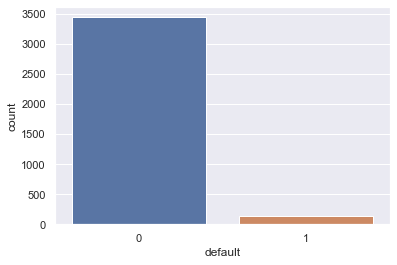

In [399]:
sns.countplot(x = 'default', data = credit2)
print
credit2['default'].value_counts()[1]

#### We wanted to see if a cluster would have the majority of defaults, but all 3 clusters have around the same. Cluster 0 has the highest amount of defaults with 144, while cluster 1 has the lowest with 86. The clusters have seem to be mainly be split into income classes, so it makes sense cluster 1 (highest income) have the lowest amount of defaulters, and cluster 0 (lowest income) have the highest amount of defaulters.

## Data Reduction (PCA) and Classification Model Building

We want to use PCA to possibly reduce the amount of components needed for an accurate model. There are only 3 componenets so we may be able to reduce to 2. We then want to build different classification models to determine which is the best at predicting if someone will default on their credit.

In [400]:
# Partition data
y = df_credit['default']
X = df_credit.drop(columns=['default'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=33)

In [401]:
# Scale data for model
scaler = StandardScaler()
# Fit on training set only
scaler.fit(X_train)
# Apply transform to both the training set and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [402]:
# Use PCA to reduce the amount of components needed to run a test
pcs = PCA(n_components = 2)
pcs.fit(X_train)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                              'Proportion of variance': pcs.explained_variance_ratio_,
                              'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2
Standard deviation,1.5588,0.9666
Proportion of variance,0.6074,0.2336
Cumulative proportion,0.6074,0.8409


2 out of 3 components cover over 91%, so we can test the models with 2 components.

In [403]:
# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.3f}' .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.3f}' .format(logreg.score(X_test, y_test)))
print('=====')
print('AIC', AIC_score(y_test, logreg.predict(X_test), df = len(df_credit.columns) + 1))
print('=====')
classificationSummary(y_test, logreg.predict(X_test))

Accuracy of Logistic regression classifier on training set: 0.973
Accuracy of Logistic regression classifier on test set: 0.973
=====
AIC -3119.374956923104
=====
Confusion Matrix (Accuracy 0.9732)

       Prediction
Actual    0    1
     0 3852   17
     1   90   41


In [404]:
#Looking for best K nearest neighbor for KNN model
results = []
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    results.append({'k': k, 'accuracy': accuracy_score(y_test, knn.predict(X_test))})
results = pd.DataFrame(results)
print(results)

   k  accuracy
0  1   0.95450
1  2   0.96675
2  3   0.96550
3  4   0.96950
4  5   0.97050
5  6   0.97250
6  7   0.97100
7  8   0.97225
8  9   0.97325


In [405]:
# With such high accuracy all around we will choose a low amount of neighbors, 2
# KNN Model
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
print('Accuracy of K-NN classifier on training set: {:.3f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.3f}'
      .format(knn.score(X_test, y_test)))
print('=====')
print('AIC', AIC_score(y_test, knn.predict(X_test), df = len(df_credit.columns) + 1))
print('=====')
classificationSummary(y_test, knn.predict(X_test))

Accuracy of K-NN classifier on training set: 0.979
Accuracy of K-NN classifier on test set: 0.967
=====
AIC -2249.2937818837145
=====
Confusion Matrix (Accuracy 0.9667)

       Prediction
Actual    0    1
     0 3838   31
     1  102   29


In [406]:
#Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.3f}'
      .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.3f}'
      .format(gnb.score(X_test, y_test)))
print('=====')
print('AIC', AIC_score(y_test, gnb.predict(X_test), df = len(df_credit.columns) + 1))
print('=====')
classificationSummary(y_test, gnb.predict(X_test))

Accuracy of GNB classifier on training set: 0.966
Accuracy of GNB classifier on test set: 0.965
=====
AIC -2044.1206043335114
=====
Confusion Matrix (Accuracy 0.9650)

       Prediction
Actual    0    1
     0 3826   43
     1   97   34


### Conclusion: Our Logistic Regression model is the best model to predict if a creditor will default or not. Logistic Regression had most negative (lowest) AIC score of the 3 models ran.